In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
%matplotlib inline


Importing data set

In [126]:
data= pd.read_csv('penguins.csv')
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [129]:
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,False,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,False,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,True,False
340,46.8,14.3,215.0,4850.0,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,True,False


Missing values

In [127]:
data = data.dropna()

data=data.drop([9,14])


Preprocessing

In [128]:
data=pd.get_dummies(data=data, columns=['sex'])


In [133]:
data.drop('sex_.', axis=1,inplace=True)

In [ ]:
plt.scatter(data['flipper_length_mm'],data['body_mass_g'])

In [ ]:
plt.scatter(data['culmen_length_mm'],data['culmen_depth_mm'])

SCALING

In [134]:
scaler=StandardScaler()
data['culmen_length_mm']=scaler.fit_transform( data[['culmen_length_mm']])
data['culmen_depth_mm']=scaler.fit_transform(data[['culmen_depth_mm']])
data['flipper_length_mm']=scaler.fit_transform(data[['flipper_length_mm']])
data['body_mass_g']=scaler.fit_transform(data[['body_mass_g']])
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,False,True
1,-0.831938,0.128503,-1.071522,-0.507579,True,False
2,-0.684775,0.435252,-0.429637,-1.191006,True,False
4,-1.347011,1.099875,-0.572278,-0.942487,True,False
5,-0.868729,1.764498,-0.786240,-0.693968,False,True
...,...,...,...,...,...,...
338,0.584511,-1.763116,0.925454,0.890339,True,False
340,0.510929,-1.456367,0.996775,0.797145,True,False
341,1.173166,-0.740619,1.496019,1.915480,False,True
342,0.216602,-1.200743,0.782813,1.232053,True,False


Dimension Reduction

In [135]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
data_pca = pca.fit_transform(data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head






<bound method NDFrame.head of           PC1       PC2
0   -1.757037  0.634751
1   -1.413225 -0.624910
2   -1.470868 -0.433997
3   -1.966297 -0.154451
4   -1.803617  1.332623
..        ...       ...
328  1.860476 -1.423561
329  1.701556 -1.235644
330  2.819991  0.423059
331  1.589586 -1.103235
332  2.092684  0.515387

[333 rows x 2 columns]>

Elbow Method

In [136]:
k_rang= range(1,9)
sse=[]
for k in k_rang:
    km=KMeans(n_clusters=k)
    km.fit(data_pca)
    sse.append(km.inertia_)
sse



[1275.6931409636375,
 497.0128478890069,
 292.87416569016466,
 169.4519465266699,
 117.0845549915826,
 104.23842702055094,
 83.4893356048606,
 73.10155855636205]

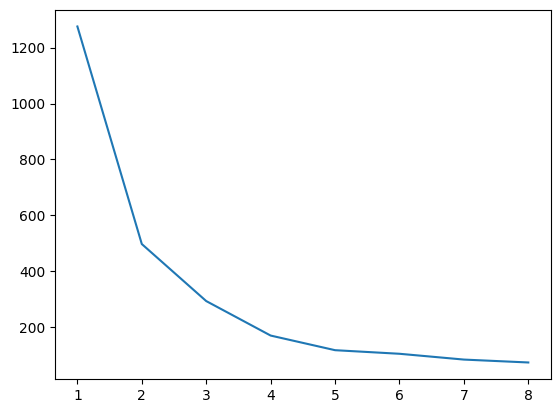

In [137]:

plt.plot(k_rang, sse)

K Means


In [138]:
kfinal=KMeans(n_clusters=4)
kfinal

KMeans(n_clusters=4)

In [139]:
y_2=kfinal.fit_predict(data_pca)
y_2

array([0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 3, 1, 3, 1, 1, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1,
       1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,

scalar plot

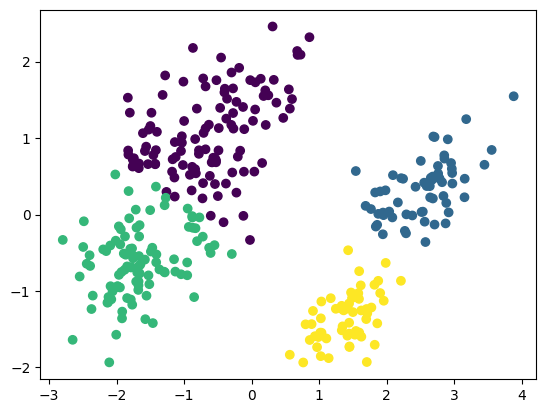

In [140]:
x=data_pca['PC1']
y=data_pca['PC2']
plt.scatter(x,y,c= y_2)
